<a href="https://colab.research.google.com/github/qazi112/ML-CNN-FACEMASK-WEBSITE/blob/master/face_mask_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math, os ,json, shutil

In [ ]:
!pip install tensorflowjs

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import cv2 as cv
import numpy as np
import sys 
from tensorflow.keras.utils import to_categorical

**Below code unzip the zipped dataset**

In [ ]:
# !unzip -uq "/content/gdrive/My Drive/FaceData.zip" -d "/content/gdrive/My Drive/FaceData_New"

This Is The Path of Dataset

In [ ]:
!ls "/content/gdrive/My Drive/FaceData_New/FaceData/"

with_mask  without_mask


**Get Dataset Directory**

In [ ]:
dataset_dir = "/content/gdrive/My Drive/FaceData_New/FaceData/"

print(dataset_dir)

/content/gdrive/My Drive/FaceData_New/FaceData/


In [ ]:
os.listdir(dataset_dir)

['without_mask', 'with_mask']

**Get The Categories**

In [ ]:
categories = list(os.listdir(dataset_dir))
print(categories)

['without_mask', 'with_mask']


In [ ]:
labeled_categories = {}
labels = [i for i in range(len(categories))]
labeled_categories = dict(zip(categories,labels))
print(labels)
print(labeled_categories)
print(categories)

[0, 1]
{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']


In [ ]:
print(labeled_categories.keys())

dict_keys(['without_mask', 'with_mask'])


**A Bit of Preprocessing.... BGR_2GRAY and Resize**

In [ ]:
image_size = 300
data = []
targets = []
for category in categories:
  folder_path = os.path.join(dataset_dir,category)
  img_names = os.listdir(folder_path)
  
  for img_name in img_names:
    img_path = os.path.join(folder_path,img_name)
    # read the image
    img = cv.imread(img_path)
    try:
      # convert to grayscale
      img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
      # Resize using cv.resize with interpolation INTER_AREA
      resized = cv.resize(img_gray,(image_size,image_size),interpolation = cv.INTER_AREA)
      data.append(resized)
      targets.append(labeled_categories[category])
    except Exception as e:
      print("Error : ",e)

In [ ]:
# Normalize the data (0-1)

data = np.array(data)/255.0

data = np.reshape(data,(data.shape[0],image_size,image_size,1))
targets = np.array(targets)
new_targets = to_categorical(targets)
print(new_targets[0])
print(labeled_categories)
np.save("data",data)
np.save("target",new_targets)


[1. 0.]
{'without_mask': 0, 'with_mask': 1}


Below is funcion to get Key from Value from dictionary

In [ ]:
def get_key(val):
    for key, value in labeled_categories.items():
         if val == value:
             return key

**Sklearn.model_selection import train_test_split splits data into train and test datasets**

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target =train_test_split(data,new_targets,test_size=0.2)
print(test_target.shape)

(276, 2)


In [ ]:
train_target = np.array(train_target,dtype="int32")


In [ ]:
train_data

**Building the CNN architecture**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D , Dropout , Activation , Flatten
from tensorflow.keras.callbacks import ModelCheckpoint


In [ ]:
train_data[0].shape

(300, 300, 1)

In [ ]:
model = Sequential()
# First conv layer
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=data.shape[1:]))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.3))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(layers.Dense(100,activation="relu"))
model.add(layers.Dense(2,activation="softmax"))




In [ ]:
checkpoint_dir = 'face_saved_model'
checkpoint = ModelCheckpoint(filepath=checkpoint_dir, 
                            frequency = "epoch",
                            save_weights_only = False,
                             verbose= True)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
             

              )


In [ ]:
# checkpoint = ModelCheckpoint('Model-{epoch:03d}.model',monitor="val_loss",verbose=0,save_best_only=True,mode='auto')
history = model.fit(train_data,train_target,callbacks=[checkpoint],validation_split=0.2,epochs=5,batch_size=32)



Epoch 1/5
28/28 [==============================] - 163s 6s/step - loss: 1.1925 - accuracy: 0.5265 - val_loss: 0.6749 - val_accuracy: 0.5682

Epoch 00001: saving model to face_saved_model
INFO:tensorflow:Assets written to: face_saved_model/assets
Epoch 2/5
28/28 [==============================] - 163s 6s/step - loss: 0.6352 - accuracy: 0.6215 - val_loss: 0.5480 - val_accuracy: 0.7364

Epoch 00002: saving model to face_saved_model
INFO:tensorflow:Assets written to: face_saved_model/assets
Epoch 3/5
28/28 [==============================] - 158s 6s/step - loss: 0.4645 - accuracy: 0.7838 - val_loss: 0.8161 - val_accuracy: 0.5273

Epoch 00003: saving model to face_saved_model
INFO:tensorflow:Assets written to: face_saved_model/assets
Epoch 4/5
28/28 [==============================] - 160s 6s/step - loss: 0.2951 - accuracy: 0.8961 - val_loss: 0.5281 - val_accuracy: 0.7500

Epoch 00004: saving model to face_saved_model
INFO:tensorflow:Assets written to: face_saved_model/assets
Epoch 5/5
28/28 

# **Test Accuracy Check**

In [ ]:
test_target= np.array(test_target,dtype="int32")
test_loss,test_acc = model.evaluate(test_data,test_target)
print(test_acc)

In [ ]:
import tensorflowjs as tfjs

ModuleNotFoundError: ignored

In [ ]:
tfjs.converters.save_keras_model(model, 'new_models')

/usr/local/lib/python3.7/dist-packages/tensorflowjs/converters/keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)


In [ ]:
from tensorflow.keras.models import load_model
arsalan = load_model("/content/gdrive/My Drive/face_saved_model")

OSError: ignored

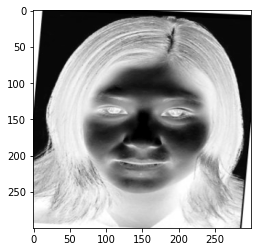

In [ ]:
name = test_data[1].copy()
name_graph = name.reshape((300,300))
name = name.reshape((1,300,300,1))
import matplotlib.pyplot as plt
plt.imshow(name_graph,cmap = plt.cm.binary)
plt.show()


In [ ]:
predictions = arsalan.predict(name)
print(predictions)
np.argmax(predictions)
get_key(np.argmax(predictions))

[[0.9811281  0.01887188]]


'without_mask'

In [ ]:
!ls "/content/gdrive/MyDrive/"

Note : For resizing use, cv.resize(source,new_shape(,),interpolation = cv.INTER_AREA)

(300, 300)


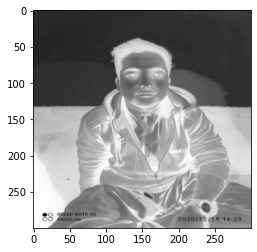

In [ ]:
img = cv.imread("/content/gdrive/My Drive/hassan.jpeg",cv.IMREAD_UNCHANGED)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# resizing the image use cv.resize but with extra care

resized_image = cv.resize(img,(300,300),interpolation= cv.INTER_AREA)
img_gray = cv.cvtColor(resized_image,cv.COLOR_BGR2GRAY)
print(img_gray.shape)
import matplotlib.pyplot as plt
plt.imshow(img_gray,cmap=plt.cm.binary)
plt.show()


In [ ]:
img_gray = img_gray.reshape((1,300,300,1))
img_gray.shape
pre = arsalan.predict(img_gray)
get_key(np.argmax(pre))

'without_mask'

In [ ]:
img_gray.shape

(100, 100)

**Reshape Numpy Array using cv with some scaling**

In [ ]:
def resizeImage(frame , scale = 0.5):
  width = int(frame.shape[1]*scale)
  height = int(frame.shape[0]*scale)
  dimensions = tuple((width,height))
  return cv.resize(frame,dimensions,interpolation = cv.INTER_AREA)

Use below function to resize image with specific width and heigth

In [ ]:
def resizeImage(frame , width , height):
  
  dimensions = tuple((width,height))
  return cv.resize(frame,dimensions,interpolation = cv.INTER_AREA)

In [ ]:
new_model = keras.models.load_model("/content/gdrive/My Drive/")

In [ ]:
loss, acc = new_model.evaluate(test_data,test_target)

9/9 [==============================] - 36s 4s/step - loss: 0.6860 - accuracy: 0.5616
